In [1081]:
!python --version


Python 3.12.7


# Práctica del módulo Machine Learning *Daniel Mazón*

# 1. Preparación de datos: División *train/test*

Comenzamos con la prática importanto el dataset


Primero cargamos librerías y funciones necesarias.

In [1085]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Empezamos con la importación del dataset, teniendo encuenta que los datos están separados por ";"
Como de datos y mostramos las primeras filas.

In [1088]:
# Carga del dataset
house_data = pd.read_csv("./data/airbnb-listings-extract.csv", sep=';')  
print(f"Dimensiones del dataset: {house_data.shape}")


Dimensiones del dataset: (14780, 89)


In [1090]:
# Configuro Pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [1092]:
# Muestros las primeras filas transpuestas para mejor visualización
print("Primeras filas:")
print(house_data.head(2).T)


Primeras filas:
                                                                                0  \
ID                                                                       11210388   
Listing Url                                 https://www.airbnb.com/rooms/11210388   
Scrape ID                                                          20170306202425   
Last Scraped                                                           2017-03-07   
Name                                               The Loft-Full Bath-Deck w/View   
Summary                         Loft in the Hill country 12-15 minutes directl...   
Space                           This loft has a spectacular view of the hills ...   
Description                     Loft in the Hill country 12-15 minutes directl...   
Experiences Offered                                                          none   
Neighborhood Overview           This neighborhood is located in the hills west...   
Notes                           The loft is locat

Ya veo que el dataset tiene muchas columnas, antes de empezar a limpiar datos, separo los datos de training y tests con el método `train_test_split`

In [1095]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("./data/airbnb-listings-extract.csv", sep=';')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

house_data_train = pd.read_csv('./data/airbnb_train.csv', sep=';', decimal='.')
house_data_train.head(5).T

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
Summary,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,NaN
Space,"Un piso muy cómodo en Jerónimos, una de las zo...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
Description,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,El barrio de Jeronimos es un enclave tranquilo...,"Situado en el corazón de Madrid, este apartame...",NaN,NaN,NaN


A partir de este momento ya tenemos cargado el dataset de train y ya solo trabajamos con el. Lo he llamado `house_data_train`

# 2. Análisis exploratorio

Utilizando funciones de Pandas describe, dtypes, shape, etc. Empezamos con el análisis.


In [1099]:
house_data_train.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,2881.000000,2869.000000,5052.000000,6974.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,396.489451,73.712592,378.437348,1432.390728,189.312154,32.073129,1.581614,7.637601,3.109946,961.732070,8.949002,22.949256,39.803958,202.217185,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,671.125823,71.624844,194.751472,1236.992934,116.011858,31.278032,1.160518,12.373491,13.427477,9387.640642,9.340334,19.762734,29.663314,128.006830,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,0.000000,34.000000,220.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,11.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,90.000000,55.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,240.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,624.000000,87.000000,500.000000,1750.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,6997.000000,969.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


Ya vemos 
`Price` tiene un rango amplio (de 0 hasta más de 10 millones). Esto sugiere que podría haber valores atípicos o registros incorrectos que tendremos que limpiar.
Columnas como `Host Response Rate`, `Host Listings Count`, `Reviews per Month`, etc. Tienen valores nulos.

Antes de seguir voy a revisar las columnas que serán interesantes para predecir el precio y preparo el dataset de test para ir borrando.
Un planteamiento es pensar que me serviran la información referente a ubicación, habitaciones, camas, baños, tamaño, puntuación de reseñas,  para NO borrarlas y suprimir las de tipo:
ID, URL, sirven para identificar o listar.
El nombre de establecimiento, el nombre de dueño, reglas... No dan valor de predicción directo.
Neighbourhood, Neighbourhood Cleansed, Neighbourhood Group Cleansed, dan valor repetido que ya tenemos en City.

Por otro lado tengo algo de duda con Weekly Price, Monthly Price, Security Deposit, Cleaning Fee, que lo mismo nos aportan información adicional.
Los datos de disponibilidad tambien tengo algo de dudas, pero no creo que precio tenga impacto directo en el precio. 
columnas sin datos, etc.

In [1102]:
#Por defecto la relación natural para predecir el precio serían las relacionadas con el tamaña, el número de habitaciones, de camas, la ubicación...
#Empiezo a borrar columnas
columns_to_drop = [
    'ID', 'Listing Url','Scrape ID', 'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 
    'Host ID', 'Host URL', 'Host Name', 'Host Location', 'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Thumbnail Url',
    'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Market', 'Neighbourhood', 'Neighbourhood Cleansed',
    'Neighbourhood Group Cleansed', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Calendar Updated', 
    'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'License', 'Jurisdiction Names',
    'Cancellation Policy', 'Reviews per Month', 'Features', 'Experiences Offered', 'Country Code', 'Smart Location', 'Geolocation', 'Last Scraped'
]

# Eliminar columnas en house_data_train
house_data_train = house_data_train.drop(columns=columns_to_drop)

# Verificar dimensiones después de eliminar columnas
print(f"Dimensiones del dataset de entrenamiento después de eliminar columnas: {house_data_train.shape}")




    

Dimensiones del dataset de entrenamiento después de eliminar columnas: (11824, 36)


In [1104]:
# Muestros las primeras filas transpuestas para mejor visualización
house_data_train.describe()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
count,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000
mean,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,396.489451,73.712592,1.581614,7.637601,3.109946,961.732070,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313
std,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,671.125823,71.624844,1.160518,12.373491,13.427477,9387.640642,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580
min,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,0.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,0.000000,34.000000,1.000000,0.000000,1.000000,365.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000
50%,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,90.000000,55.000000,1.000000,0.000000,2.000000,1125.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000
75%,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,624.000000,87.000000,2.000000,15.000000,3.000000,1125.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000
max,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,6997.000000,969.000000,16.000000,500.000000,1125.000000,1000000.000000,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000


In [1106]:
# Contar la cantidad de registros por país
country_counts = house_data_train['Country'].value_counts()

# Mostrar el resultado
print(country_counts)


Country
Spain             11203
United States       139
United Kingdom      127
France               87
Italy                61
Australia            38
Ireland              34
Germany              33
Austria              26
Netherlands          19
Belgium              16
Canada               16
Denmark              14
Switzerland           4
Greece                3
Hong Kong             2
Cuba                  1
Name: count, dtype: int64


In [1108]:
#Crear una nueva columna 'Country_Spain' que será 1 si el país es España y 0 si no lo es
house_data_train['Country_Spain'] = house_data_train['Country'].apply(lambda x: 1 if x == 'Spain' else 0)

#Filtrar solo los registros donde 'Country_Spain' sea 1 (solo España)
house_data_train = house_data_train[house_data_train['Country_Spain'] == 1]

#Eliminar la columna 'Country' ya que hemos creado la columna 'Country_Spain'
house_data_train = house_data_train.drop(columns=['Country'])

# Verificar las primeras 
print(house_data_train.head())

# Verificar las dimensiones del dataset después del filtrado
print(f"Dimensiones del dataset después de los filtros: {house_data_train.shape}")



   Host Since  Host Response Rate  Host Listings Count  \
0  2015-04-13               100.0                  2.0   
1  2016-07-22               100.0                  1.0   
2  2016-07-17               100.0                 16.0   
3  2014-05-08               100.0                114.0   
4  2012-02-06               100.0                  2.0   

   Host Total Listings Count    City                State Zipcode   Latitude  \
0                        2.0  Madrid  Comunidad de Madrid   28014  40.407732   
1                        1.0  Madrid  Comunidad de Madrid   28012  40.415802   
2                       16.0  Madrid  Comunidad de Madrid   28025  40.389048   
3                      114.0  Madrid  Comunidad de Madrid   28012  40.412814   
4                        2.0  Madrid                   28   28015  40.438631   

   Longitude Property Type        Room Type  Accommodates  Bathrooms  \
0  -3.684819     Apartment  Entire home/apt             4        1.0   
1  -3.705340     Apartment

In [1110]:
# Contar la cantidad de registros por City
city_counts = house_data_train['City'].value_counts()

# Mostrar el resultado
print(city_counts)


City
Madrid                                 10567
Barcelona                                235
Palma                                     44
马德里                                       43
Alcúdia                                   31
Madrid, Comunidad de Madrid, ES           14
Inca                                      12
Palma de Mallorca                         11
Pollença                                  10
Santa Margalida                            8
Búger                                      7
Selva                                      7
madrid                                     6
Sant Llorenç des Cardassar                 6
Deià                                       6
Can Picafort                               5
Muro                                       5
Valldemossa                                5
Manacor                                    5
Alaró                                      5
Sóller                                     5
Campanet                                   5
Polle

In [1112]:
# Contar la cantidad de registros por país
state_counts = house_data_train['State'].value_counts()

# Mostrar el resultado
print(state_counts)

State
Comunidad de Madrid             8507
Community of Madrid             1497
Madrid                           543
Catalunya                        154
Balearic Islands                 137
Illes Balears                    136
Catalonia                         44
马德里自治区                            40
Barcelona                         27
Islas Baleares                    15
PM                                 9
madrid                             8
CT                                 5
Spain                              4
España                             4
Mallorca                           3
Communauté de Madrid               3
马德里                                3
28                                 2
Cataluña                           2
MADRID                             2
馬德里自治區                             2
Baleares                           1
Autonome Gemeinschaft Madrid       1
Madrid, Spain                      1
Espańa                             1
Alicante                        

In [1114]:
# Elimino estas columnas 'City' y 'State' ya que no están normalizadas y al tener latitud y longitud no pierdo datos
house_data_train = house_data_train.drop(['City', 'State'], axis=1)


In [1116]:
# Contar la cantidad de registros por variable Property Types
property_counts = house_data_train['Property Type'].value_counts()

# Mostrar el resultado
print(property_counts)



Property Type
Apartment             9127
House                  972
Condominium            276
Bed & Breakfast        268
Loft                   236
Other                  168
Dorm                    37
Guesthouse              31
Chalet                  22
Villa                   15
Hostel                  13
Townhouse               11
Serviced apartment       9
Boutique hotel           5
Camper/RV                3
Casa particular          3
Guest suite              2
Earth House              2
Tent                     1
Boat                     1
Bungalow                 1
Name: count, dtype: int64


Apartment representan cerca del 85% de los datos (9,598 de 11,834 registros totales).Continuo trabajando solo con estas categorías.

In [1119]:
# Generar dummies para todas las categorías de 'Property Type'
house_data_train = pd.get_dummies(house_data_train, columns=['Property Type'], prefix='Property Type')

# Eliminar todas las columnas dummies excepto 'Property Type_Apartment'
house_data_train = house_data_train.drop(columns=[col for col in house_data_train.columns if 'Property Type_' in col and col != 'Property Type_Apartment'])

# Ver si hay valores nulos
house_data_train.isnull().any()


Host Since                         True
Host Response Rate                 True
Host Listings Count                True
Host Total Listings Count          True
Zipcode                            True
Latitude                          False
Longitude                         False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Square Feet                        True
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
First Review                       True
Last Review                        True
Review Scores Rating               True


In [1121]:
# Ver el porcentaje de valores nulos por columna
missing_data = house_data_train.isnull().mean() * 100
print(missing_data[missing_data > 50])  # Muestra las columnas con más del 50% de datos faltantes

Square Feet    95.938588
dtype: float64


La columna Square Feet tiene un 96% de valores faltantes, lo que es un porcentaje muy alto. Dado que la mayoría de los valores están vacíos, es una buena opción eliminar esta columna, ya que no contribuiría significativamente al modelo debido a la falta de datos.

In [1124]:
#Borro Square Feet
house_data_train = house_data_train.drop('Square Feet', axis=1)

In [1126]:
house_data_train.isnull().any()

Host Since                         True
Host Response Rate                 True
Host Listings Count                True
Host Total Listings Count          True
Zipcode                            True
Latitude                          False
Longitude                         False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
First Review                       True
Last Review                        True
Review Scores Rating               True
Review Scores Accuracy             True


In [1128]:
# Ver los tipos de habitación y la cantidad de cada uno
room_type_counts = house_data_train['Room Type'].value_counts()

# Mostrar el resultado
print(room_type_counts)

Room Type
Entire home/apt    6829
Private room       4225
Shared room         149
Name: count, dtype: int64


Separo en columnas cada tipo de Room Type

In [1131]:
# Convertir la columna 'Room Type' en variables dummy
room_type_dummies = pd.get_dummies(house_data_train['Room Type'], prefix='Room Type')

# Añadir las nuevas columnas al dataset
house_data_train = pd.concat([house_data_train, room_type_dummies], axis=1)

# Eliminar la columna original 'Room Type'
house_data_train = house_data_train.drop('Room Type', axis=1)

# Ver las primeras filas del dataset actualizado
print(house_data_train.head(1))


   Host Since  Host Response Rate  Host Listings Count  \
0  2015-04-13               100.0                  2.0   

   Host Total Listings Count Zipcode   Latitude  Longitude  Accommodates  \
0                        2.0   28014  40.407732  -3.684819             4   

   Bathrooms  Bedrooms  Beds  Bed Type  \
0        1.0       1.0   2.0  Real Bed   

                                           Amenities  Price  Guests Included  \
0  TV,Internet,Wireless Internet,Air conditioning...   60.0                1   

   Extra People  Minimum Nights  Maximum Nights Calendar last Scraped  \
0             0               2            1125            2017-04-08   

   Number of Reviews First Review Last Review  Review Scores Rating  \
0                 12   2015-04-26  2017-02-28                  95.0   

   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                     9.0                       10.0                   10.0   

   Review Scores Communication  Rev

In [1133]:
house_data_train.isnull().any()

Host Since                         True
Host Response Rate                 True
Host Listings Count                True
Host Total Listings Count          True
Zipcode                            True
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
First Review                       True
Last Review                        True
Review Scores Rating               True
Review Scores Accuracy             True
Review Scores Cleanliness          True


In [1135]:
#normalización de los baños
print(house_data_train['Bathrooms'].unique())


[1.  1.5 3.  2.  nan 4.  0.  0.5 6.  5.5 8.  2.5 3.5 5.  4.5 7.  6.5 7.5]


In [1137]:
#Reemplazar los valores nulos (nan) por la mediana:
house_data_train['Bathrooms'].fillna(house_data_train['Bathrooms'].median(), inplace=True)

#Reemplazar los valores 0 por la mediana
house_data_train['Bathrooms'] = house_data_train['Bathrooms'].replace(0, house_data_train['Bathrooms'].median())

#Redondear los valores con decimales 
house_data_train['Bathrooms'] = house_data_train['Bathrooms'].round()

#Convertir la columna Bathrooms a tipo float
house_data_train['Bathrooms'] = house_data_train['Bathrooms'].astype(float)


In [1139]:
print(house_data_train['Bathrooms'].unique())

[1. 2. 3. 4. 0. 6. 8. 5. 7.]


In [1141]:
house_data_train.isnull().any()

Host Since                         True
Host Response Rate                 True
Host Listings Count                True
Host Total Listings Count          True
Zipcode                            True
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
First Review                       True
Last Review                        True
Review Scores Rating               True
Review Scores Accuracy             True
Review Scores Cleanliness          True


Seguimos revisando los valores nulos.
Creo que es importante conocer las Amenities de cada apartamento para separarlas

In [1144]:
# Obtener las Amenities únicas en el dataset
all_amenities = house_data_train['Amenities'].str.split(',', expand=True).stack().unique()

# Ver las comodidades únicas
print(all_amenities)

['TV' 'Internet' 'Wireless Internet' 'Air conditioning' 'Kitchen'
 'Doorman' 'Elevator in building' 'Buzzer/wireless intercom' 'Heating'
 'Family/kid friendly' 'Washer' 'Essentials' 'Hangers' 'Smoke detector'
 'Carbon monoxide detector' 'Shampoo' '24-hour check-in' 'Hair dryer'
 'Iron' 'Laptop friendly workspace' 'Wheelchair accessible' 'Pool'
 'Free parking on premises' 'Breakfast' 'Suitable for events'
 'First aid kit' 'Safety card' 'Fire extinguisher' 'Lock on bedroom door'
 'Smoking allowed' 'Cable TV' 'translation missing: en.hosting_amenity_50'
 'translation missing: en.hosting_amenity_49' 'Private entrance' 'Dryer'
 'Pets allowed' 'Hot tub' 'Indoor fireplace' 'Gym' 'Private living room'
 'Pets live on this property' 'Dog(s)' 'Bathtub' 'Self Check-In'
 'Doorman Entry' 'Cat(s)' 'Babysitter recommendations'
 'Room-darkening shades' 'Other pet(s)' 'Smartlock' 'Lockbox' 'High chair'
 'Window guards' 'Crib' 'Pack ’n Play/travel crib' 'Keypad'
 'Outlet covers' 'Baby bath' 'Changing tab

In [1146]:
# Estandarizar nombres de comodidades  mayúsculas/minúsculas
house_data_train['Amenities'] = house_data_train['Amenities'].str.replace(r'\b([a-z])', lambda x: x.group(1).upper(), regex=True)

# Asegurarse de que todos los valores sean cadenas de texto
house_data_train['Amenities'] = house_data_train['Amenities'].fillna('').astype(str)

# Eliminar las comodidades irrelevantes
irrelevant_amenities = ['translation missing: en.hosting_amenity_50', 'translation missing: en.hosting_amenity_49']
house_data_train['Amenities'] = house_data_train['Amenities'].apply(lambda x: ','.join([i for i in x.split(',') if i not in irrelevant_amenities]))

# Verifica que el cambio se haya aplicado correctamente
print(house_data_train['Amenities'].head())

0    TV,Internet,Wireless Internet,Air Conditioning...
1    TV,Internet,Wireless Internet,Air Conditioning...
2    Internet,Wireless Internet,Wheelchair Accessib...
3    Wireless Internet,Kitchen,Smoking Allowed,Heat...
4    TV,Cable TV,Internet,Wireless Internet,Air Con...
Name: Amenities, dtype: object


In [1148]:
house_data_train.isnull().any()

Host Since                         True
Host Response Rate                 True
Host Listings Count                True
Host Total Listings Count          True
Zipcode                            True
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                         False
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
First Review                       True
Last Review                        True
Review Scores Rating               True
Review Scores Accuracy             True
Review Scores Cleanliness          True


In [1150]:
#Revisar cuantos valores tienen Zipcode a NaN
house_data_train['Zipcode'].isna().sum()


365

In [1152]:
#Como con latitud y longitud este dato incompleto es redundante, borramos variable
house_data_train = house_data_train.drop(columns=['Zipcode'])


In [1154]:
house_data_train.isnull().any()

Host Since                         True
Host Response Rate                 True
Host Listings Count                True
Host Total Listings Count          True
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                         False
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
First Review                       True
Last Review                        True
Review Scores Rating               True
Review Scores Accuracy             True
Review Scores Cleanliness          True
Review Scores Checkin              True


In [1156]:
#Vemos cuantos registros hay en Bedrooms con valores faltantes
house_data_train['Bedrooms'].isna().sum()


19

In [1158]:
#Como solo son 19, mejor borrar esas filas
house_data_train = house_data_train.dropna(subset=['Bedrooms'])


In [1160]:
house_data_train.isnull().any()

Host Since                         True
Host Response Rate                 True
Host Listings Count                True
Host Total Listings Count          True
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                               True
Bed Type                          False
Amenities                         False
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
First Review                       True
Last Review                        True
Review Scores Rating               True
Review Scores Accuracy             True
Review Scores Cleanliness          True
Review Scores Checkin              True


In [1162]:
#Vemos cuantos registros hay en Beds con valores faltantes
house_data_train['Beds'].isna().sum()


28

In [1164]:
#Como solo son 28, mejor borrar esas filas
house_data_train = house_data_train.dropna(subset=['Beds'])


In [1166]:
house_data_train.isnull().any()

Host Since                         True
Host Response Rate                 True
Host Listings Count                True
Host Total Listings Count          True
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
First Review                       True
Last Review                        True
Review Scores Rating               True
Review Scores Accuracy             True
Review Scores Cleanliness          True
Review Scores Checkin              True


In [1168]:
#Vemos cuantos registros hay en Host Since con valores faltantes
house_data_train['Host Since'].isna().sum()


3

In [1170]:
#Borro los 3
house_data_train = house_data_train.dropna(subset=['Host Since'])


In [1172]:
#Vemos cuantos registros hay en Host Response Rate con valores faltantes
house_data_train['Host Response Rate'].isna().sum()


1371

In [1174]:
#como son muchos borro la variable que ya no aportará valora con tantos vacios 
house_data_train = house_data_train.drop(['Host Response Rate'], axis=1)

In [1176]:
house_data_train.head(5).T

,0,1,2,3,4
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06
Host Listings Count,2.0,1.0,16.0,114.0,2.0
Host Total Listings Count,2.0,1.0,16.0,114.0,2.0
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716
Accommodates,4,4,1,2,2
Bathrooms,1.0,1.0,2.0,3.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed


In [1178]:
house_data_train.isnull().any()

Host Since                        False
Host Listings Count               False
Host Total Listings Count         False
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
First Review                       True
Last Review                        True
Review Scores Rating               True
Review Scores Accuracy             True
Review Scores Cleanliness          True
Review Scores Checkin              True
Review Scores Communication        True


In [1180]:
# Conversión de columnas de fecha a días desde una fecha de referencia
date_columns = ['Host Since', 'First Review', 'Last Review', 'Calendar last Scraped']
reference_date = pd.to_datetime('2000-01-01')  # Fecha de referencia

# Convertir cada columna de fechas a días desde la referencia
for column in date_columns:
    if column in house_data_train.columns:  # Validar que la columna exista
        house_data_train[column] = (pd.to_datetime(house_data_train[column]) - reference_date).dt.days



In [1182]:
house_data_train.dtypes

Host Since                          int64
Host Listings Count               float64
Host Total Listings Count         float64
Latitude                          float64
Longitude                         float64
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Amenities                          object
Price                             float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Calendar last Scraped               int64
Number of Reviews                   int64
First Review                      float64
Last Review                       float64
Review Scores Rating              float64
Review Scores Accuracy            float64
Review Scores Cleanliness         float64
Review Scores Checkin             

In [1184]:
house_data_train.isnull().any()

Host Since                        False
Host Listings Count               False
Host Total Listings Count         False
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
First Review                       True
Last Review                        True
Review Scores Rating               True
Review Scores Accuracy             True
Review Scores Cleanliness          True
Review Scores Checkin              True
Review Scores Communication        True


In [1186]:
house_data_train['Review Scores Value'].isna().sum()


2532

In [1188]:
#he comprobado que a las variables Review les faltan unos 2500 registros por lo que procedo a borrarlos
# Eliminar las columnas que tienen valores faltantes
columns_to_drop = [
    'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
    'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location',
    'Review Scores Value', 'First Review', 'Last Review'
]

house_data_train = house_data_train.drop(columns=columns_to_drop)

In [1190]:
house_data_train.isnull().any()

Host Since                        False
Host Listings Count               False
Host Total Listings Count         False
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
Calculated host listings count    False
Country_Spain                     False
Property Type_Apartment           False
Room Type_Entire home/apt         False
Room Type_Private room            False
Room Type_Shared room             False
dtype: bool

In [1192]:
house_data_train.isnull().any()

Host Since                        False
Host Listings Count               False
Host Total Listings Count         False
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                              True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
Calculated host listings count    False
Country_Spain                     False
Property Type_Apartment           False
Room Type_Entire home/apt         False
Room Type_Private room            False
Room Type_Shared room             False
dtype: bool

In [1194]:
house_data_train['Price'].isnull().sum()


9

In [1196]:
# Eliminar filas con valores nulos en la columna 'Price'
house_data_train_cleaned = house_data_train.dropna(subset=['Price'])

# Verifica que se hayan eliminado correctamente
house_data_train_cleaned['Price'].isnull().sum()

0

In [1198]:
house_data_train.dropna(subset=['Price'], inplace=True)


In [1200]:
# Limpieza y conversión de la columna 'Price'
if 'Price' in house_data_train.columns:  # Validar que la columna exista
    if house_data_train['Price'].dtype == 'object':  # Si está en formato texto
        # Eliminar símbolos ($, ,) y convertir a float
        house_data_train['Price'] = house_data_train['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [1202]:
house_data_train.isnull().any()

Host Since                        False
Host Listings Count               False
Host Total Listings Count         False
Latitude                          False
Longitude                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                             False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar last Scraped             False
Number of Reviews                 False
Calculated host listings count    False
Country_Spain                     False
Property Type_Apartment           False
Room Type_Entire home/apt         False
Room Type_Private room            False
Room Type_Shared room             False
dtype: bool

# 3. Procesamiento


In [1205]:
house_data_train.dtypes


Host Since                          int64
Host Listings Count               float64
Host Total Listings Count         float64
Latitude                          float64
Longitude                         float64
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Amenities                          object
Price                             float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Calendar last Scraped               int64
Number of Reviews                   int64
Calculated host listings count    float64
Country_Spain                       int64
Property Type_Apartment              bool
Room Type_Entire home/apt            bool
Room Type_Private room               bool
Room Type_Shared room             

In [1207]:
house_data_train.head(1).T

,0
Host Since,5581
Host Listings Count,2.0
Host Total Listings Count,2.0
Latitude,40.407732
Longitude,-3.684819
Accommodates,4
Bathrooms,1.0
Bedrooms,1.0
Beds,2.0
Bed Type,Real Bed


Empezamos a explorar

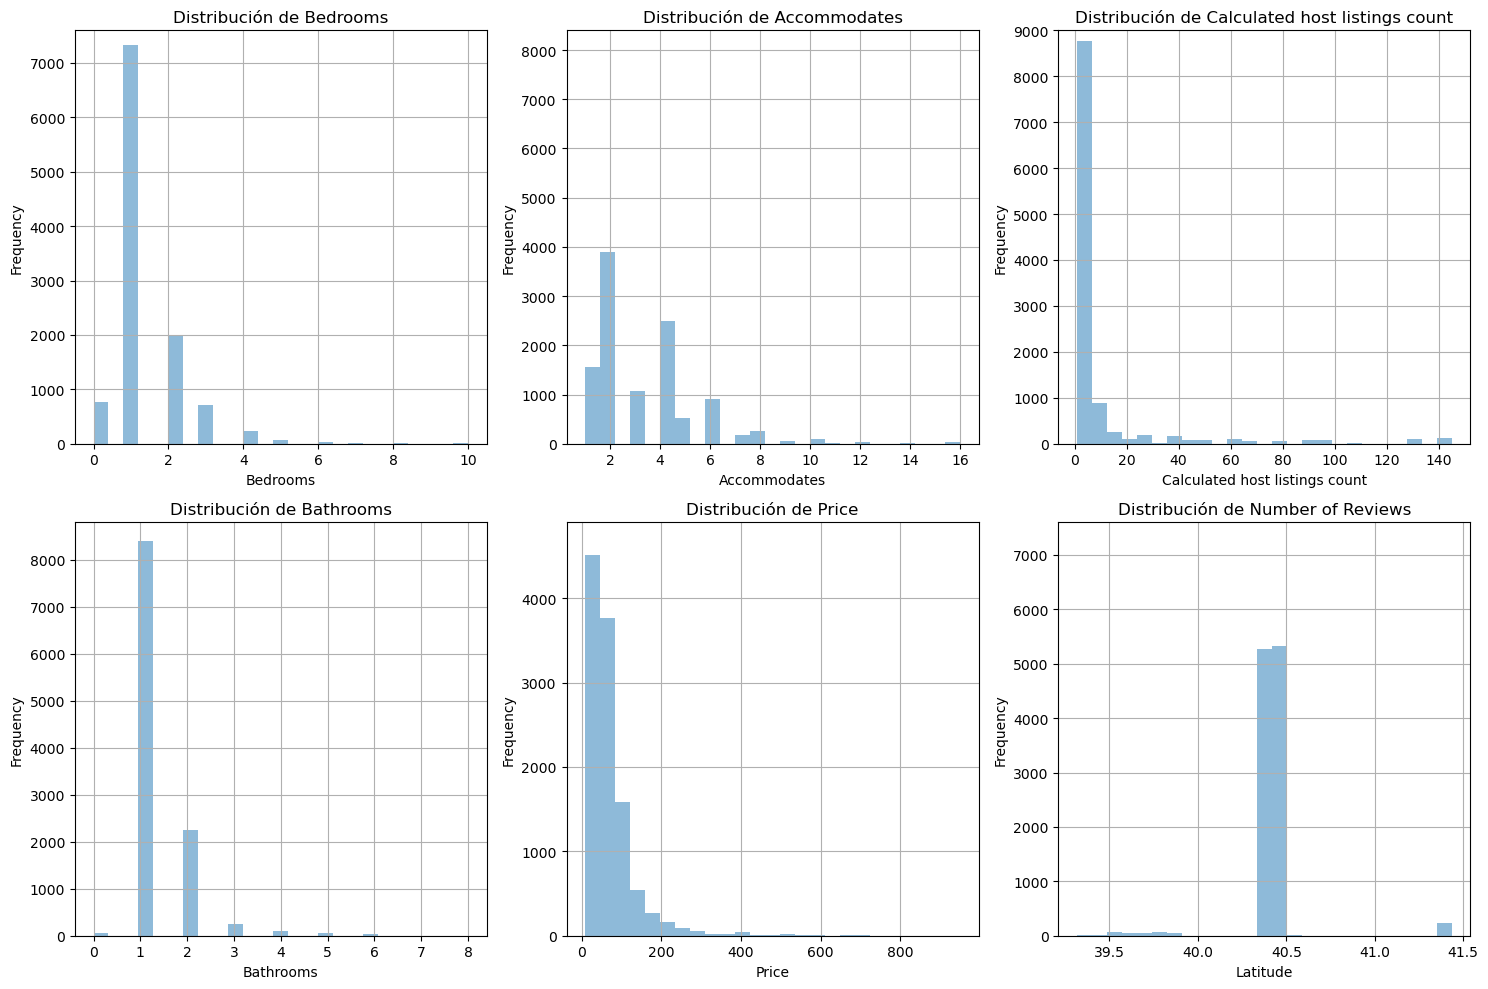

In [1282]:
import matplotlib.pyplot as plt

# Crear figura y subgráficas
plt.figure(figsize=(15, 10))

# Primer conjunto de gráficos
plt.subplot(2, 3, 1)  # Fila 1, Columna 1
house_data_train['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 7600)
plt.xlabel('Bedrooms')
plt.title('Distribución de Bedrooms')

plt.subplot(2, 3, 2)  # Fila 1, Columna 2
house_data_train['Accommodates'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 8400)
plt.xlabel('Accommodates')
plt.title('Distribución de Accommodates')

plt.subplot(2, 3, 3)  # Fila 1, Columna 3
house_data_train['Calculated host listings count'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 9000)
plt.xlabel('Calculated host listings count')
plt.title('Distribución de Calculated host listings count')

# Segundo conjunto de gráficos
plt.subplot(2, 3, 4)  # Fila 2, Columna 1
house_data_train['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 8800)
plt.xlabel('Bathrooms')
plt.title('Distribución de Bathrooms')

plt.subplot(2, 3, 5)  # Fila 2, Columna 2
house_data_train['Price'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 4900)
plt.xlabel('Price')
plt.title('Distribución de Price')

plt.subplot(2, 3, 6)  # Fila 2, Columna 3
house_data_train['Latitude'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 7600)
plt.xlabel('Latitude')
plt.title('Distribución de Number of Reviews')

#Number of Reviews

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


Casi todos los apartamentos son de 1 dormitorio y 1 baño.
Alguna casa se sale un poco de modelo por su elevado tamaño.

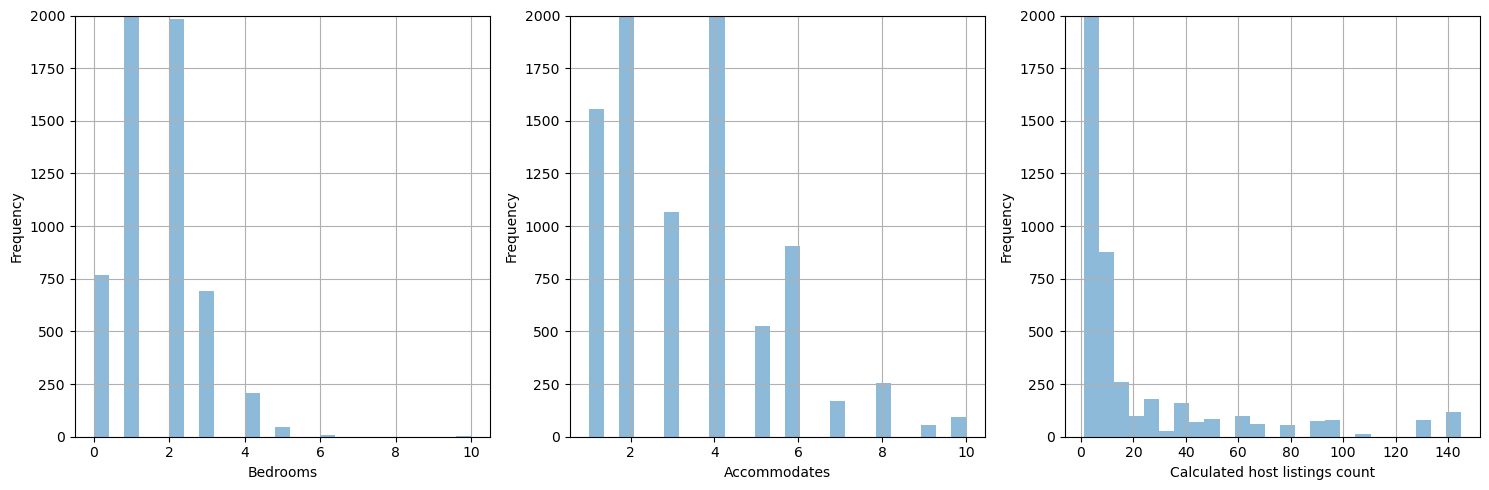

In [1213]:
# Filtrar los registros con valores ajustados para 'Bedrooms' y 'Accommodates'
house_data_train_filtered = house_data_train[
    (house_data_train['Bedrooms'] <= 10) & (house_data_train['Accommodates'] <= 10)
]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
house_data_train_filtered['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 2000)  
plt.xlabel('Bedrooms')

plt.subplot(1, 3, 2)
house_data_train_filtered['Accommodates'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 2000) 
plt.xlabel('Accommodates')

plt.subplot(1, 3, 3)
house_data_train_filtered['Calculated host listings count'].plot.hist(alpha=0.5, bins=25, grid=True)
plt.ylim(0, 2000)  
plt.xlabel('Calculated host listings count')

plt.tight_layout()
plt.show()


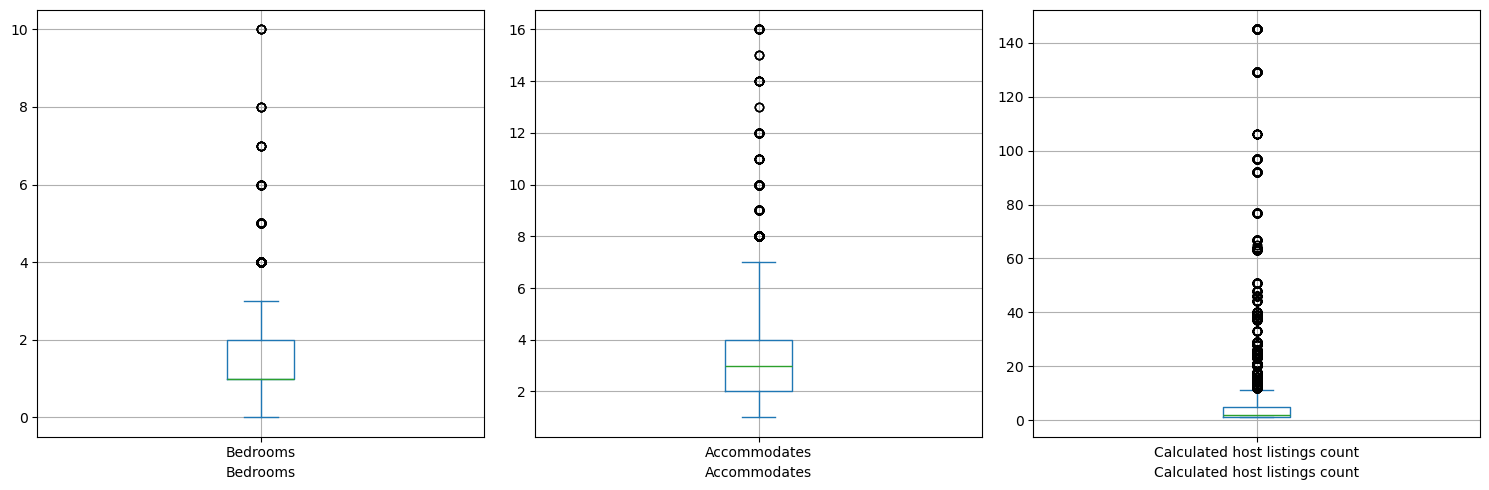

In [1215]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
house_data_train['Bedrooms'].plot.box(grid=True)
plt.xlabel('Bedrooms')

plt.subplot(1, 3, 2)
house_data_train['Accommodates'].plot.box(grid=True)
plt.xlabel('Accommodates')

plt.subplot(1, 3, 3)
house_data_train['Calculated host listings count'].plot.box(grid=True)
plt.xlabel('Calculated host listings count')

plt.tight_layout()
plt.show()

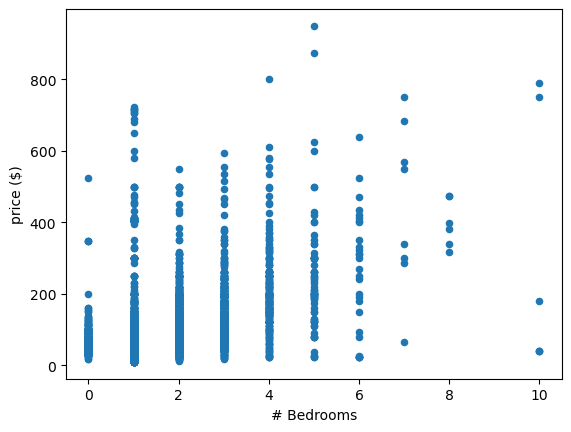

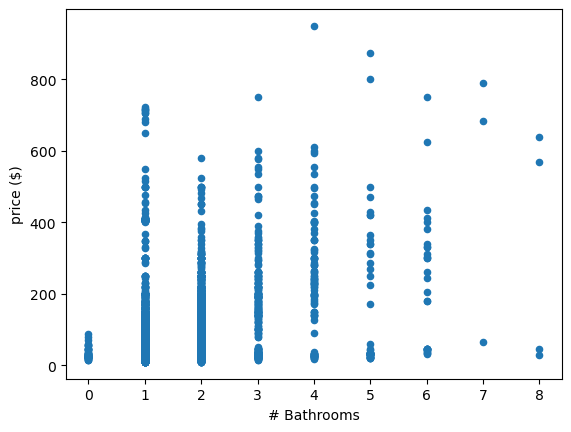

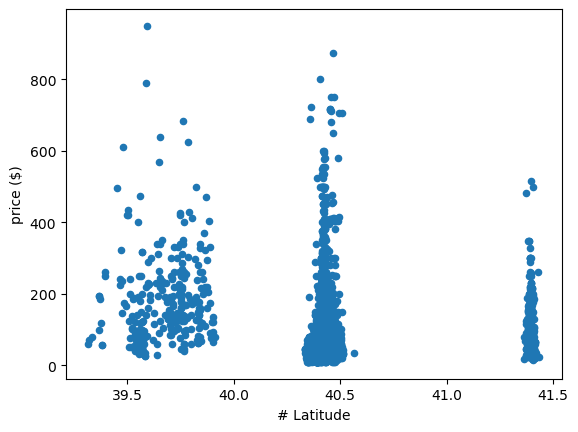

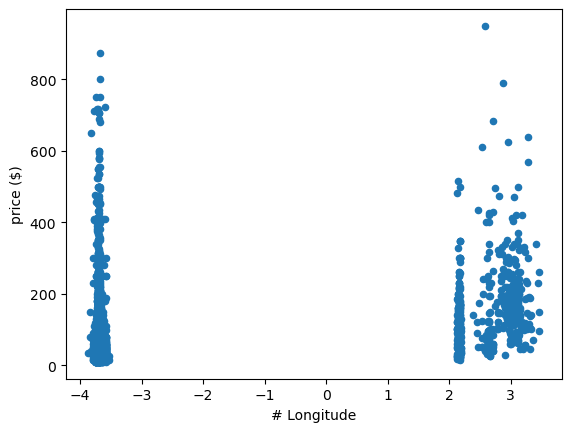

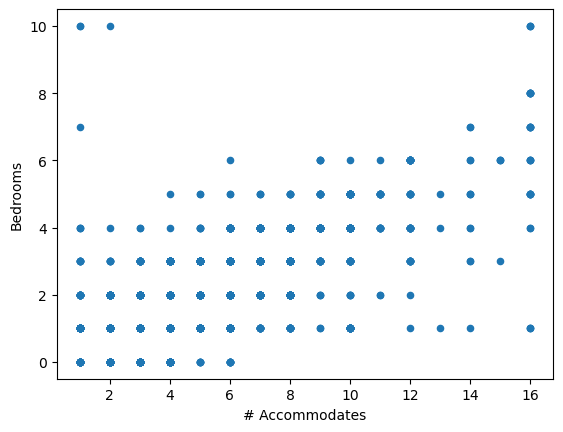

In [1217]:
house_data_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('price ($)')
plt.show()

house_data_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('price ($)')
plt.show()

house_data_train.plot(kind = 'scatter',x='Latitude',y = 'Price')
plt.xlabel('# Latitude')
plt.ylabel('price ($)')
plt.show()

house_data_train.plot(kind = 'scatter',x='Longitude',y = 'Price')
plt.xlabel('# Longitude')
plt.ylabel('price ($)')
plt.show()

house_data_train.plot(kind = 'scatter',x='Accommodates',y = 'Bedrooms')
plt.xlabel('# Accommodates')
plt.ylabel('Bedrooms')
plt.show()



plt.show()

#### Eliminación de outliers

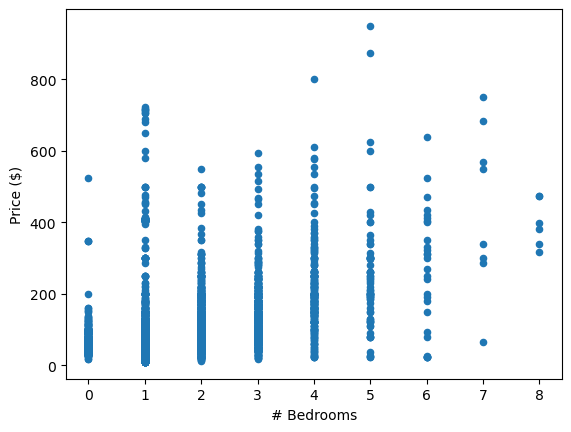

In [1220]:
house_data_train_no_outliers_bedrooms = house_data_train[house_data_train['Bedrooms'] <= 7]


house_data_train_no_outliers_bedrooms.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()


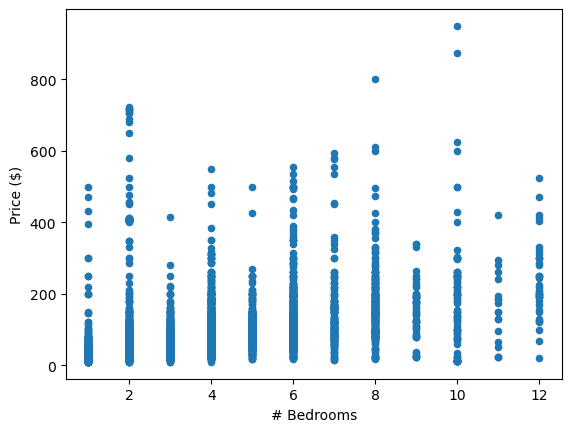

In [1280]:
house_data_train_no_outliers_accommodates = house_data_train[house_data_train['Accommodates'] <= 12]


house_data_train_no_outliers_bedrooms.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('# Accommodates')
plt.ylabel('Price ($)')
plt.show()


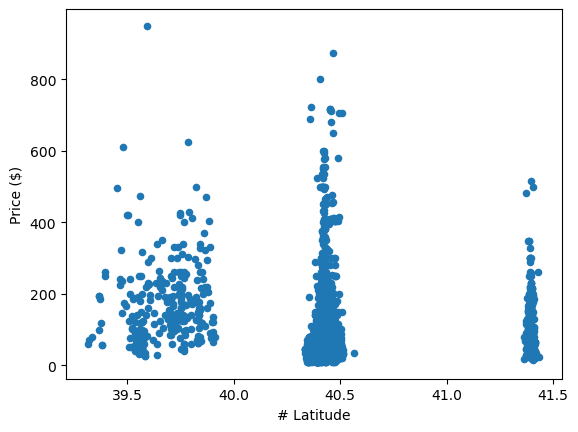

In [1284]:
house_data_train_no_outliers_accommodates = house_data_train[
    (house_data_train['Latitude'] >= 40) & 
    (house_data_train['Latitude'] <= 41)
]

house_data_train_no_outliers_bedrooms.plot(kind = 'scatter',x='Latitude',y = 'Price')
plt.xlabel('# Latitude')
plt.ylabel('Price ($)')
plt.show()


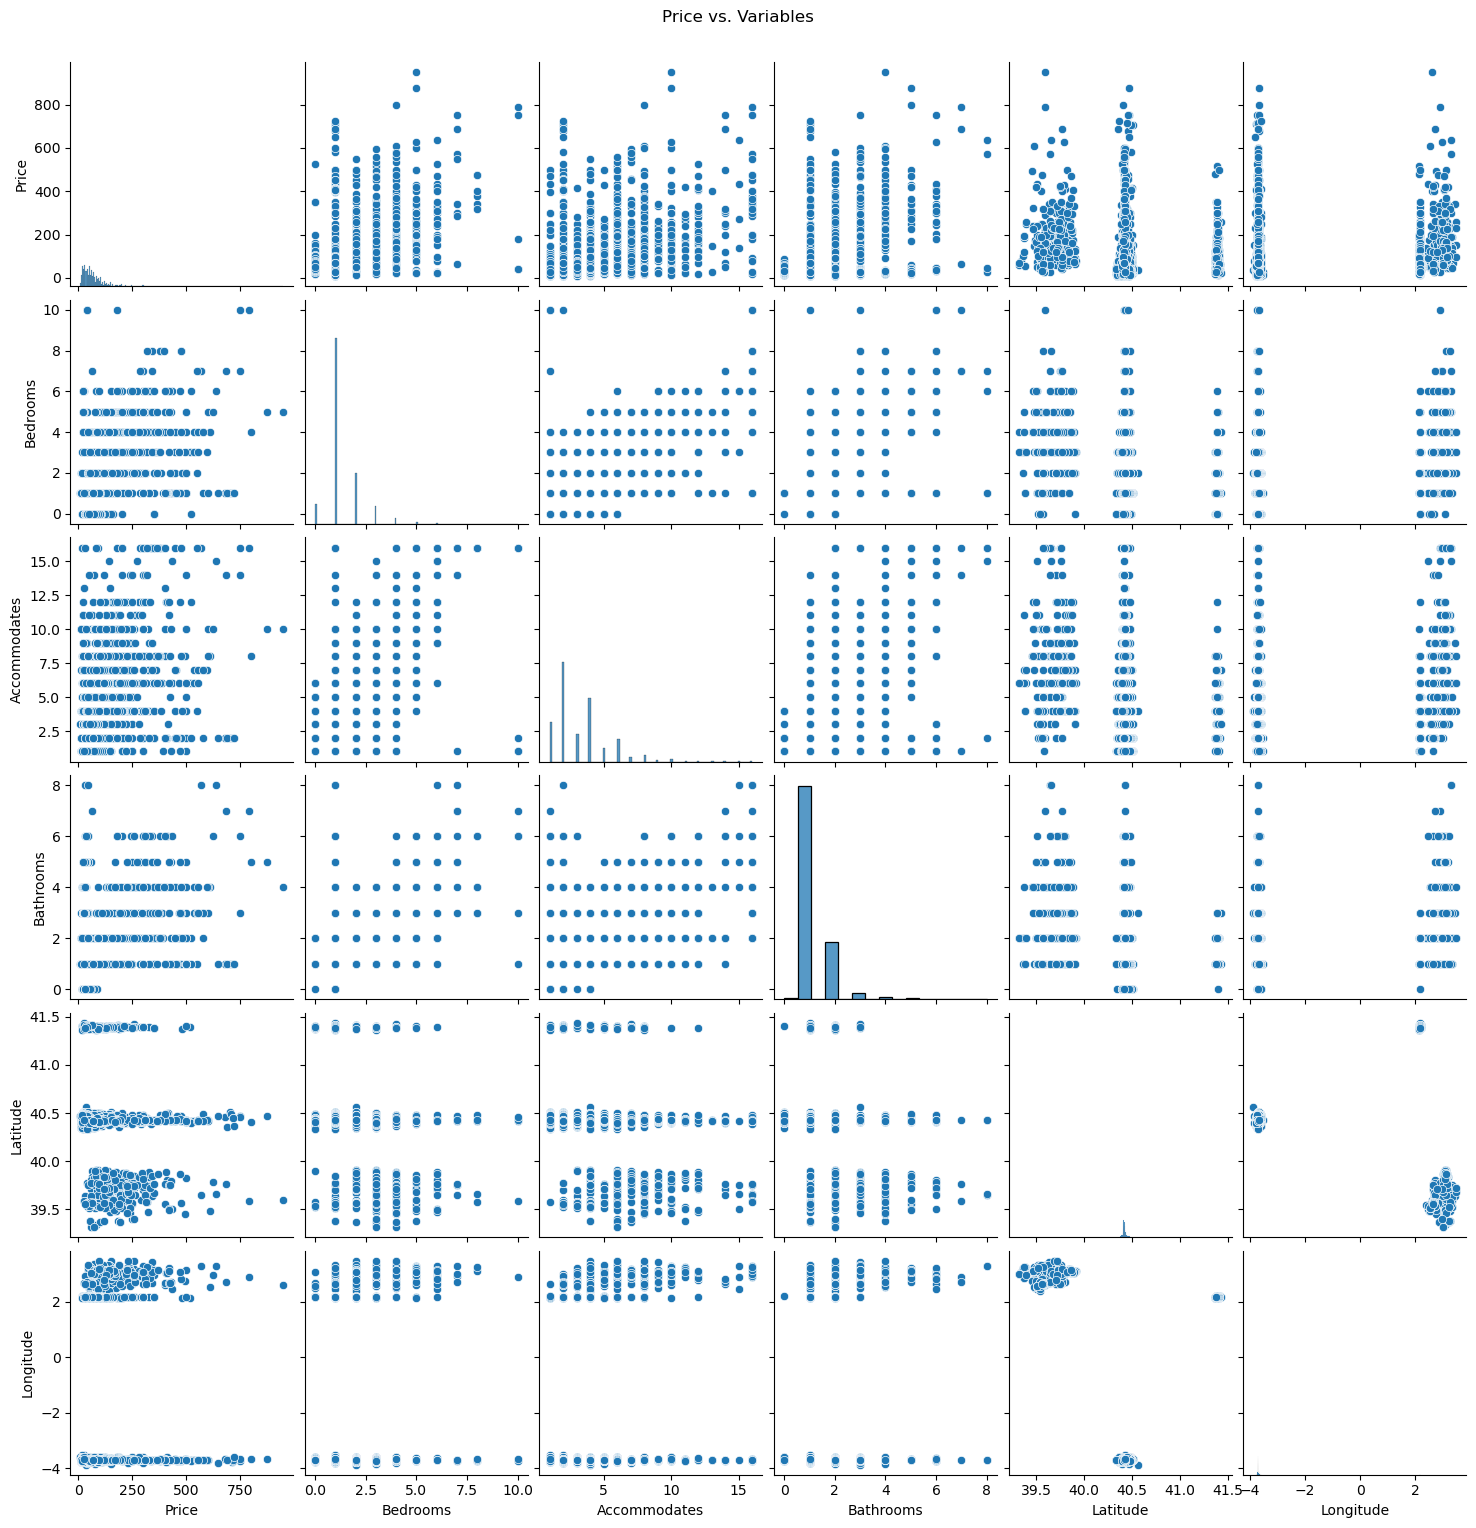

In [1222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas a comparar
cols_to_plot = ['Price', 'Bedrooms', 'Accommodates', 'Bathrooms', 'Latitude', 'Longitude']

# Crea el pairplot
sns.pairplot(house_data_train[cols_to_plot])
plt.suptitle('Price vs. Variables', y=1.02)
plt.show()


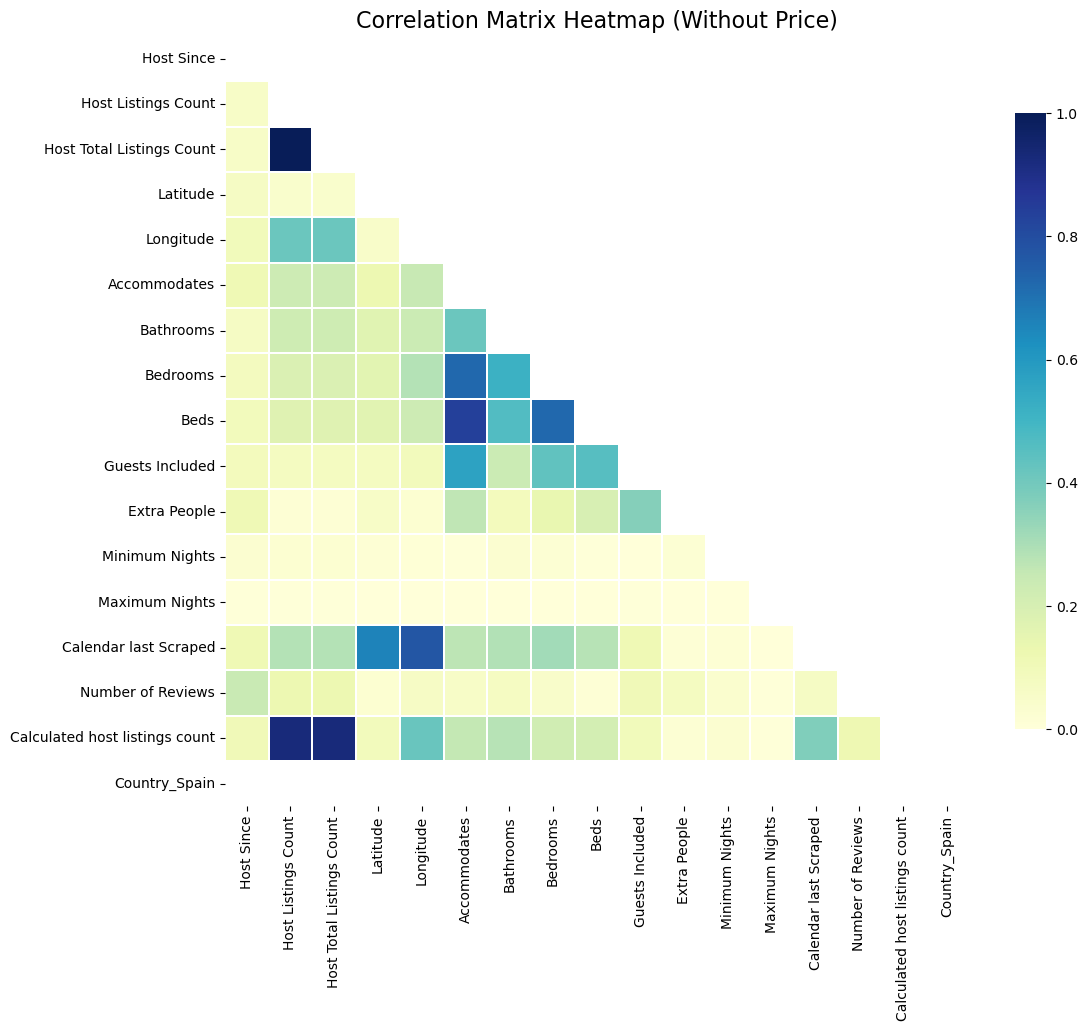

In [1224]:
#Vemos la correlación de Pandas

import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo las columnas numéricas
house_data_train_numeric = house_data_train.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = np.abs(house_data_train_numeric.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap (Without Price)', fontsize=16)

# Display the plot
plt.show()



Las relaciones más importantes son:

Beds con accommodates
Bedrooms con accommodates
Bedrooms con Beds
Bedrooms con Bathrooms

In [1227]:
# Seleccionar las variables de interés
cols_to_check = ['Beds', 'Accommodates', 'Bedrooms', 'Bathrooms']

# Calcular la matriz de correlación entre las variables seleccionadas
corr_matrix = house_data_train[cols_to_check].corr()

# Mostrar la matriz de correlación
print(corr_matrix)


                  Beds  Accommodates  Bedrooms  Bathrooms
Beds          1.000000      0.838950  0.726064   0.467686
Accommodates  0.838950      1.000000  0.722902   0.416204
Bedrooms      0.726064      0.722902  1.000000   0.516174
Bathrooms     0.467686      0.416204  0.516174   1.000000


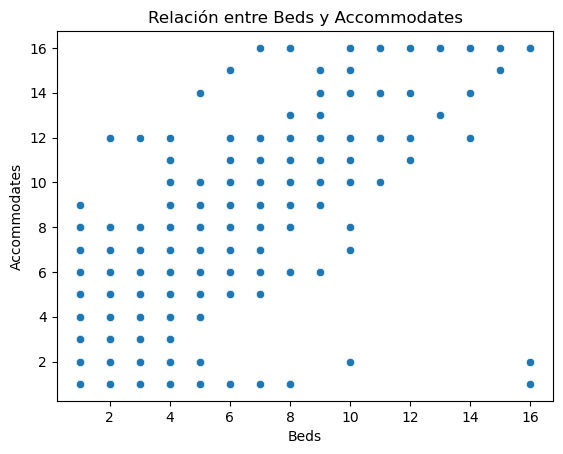

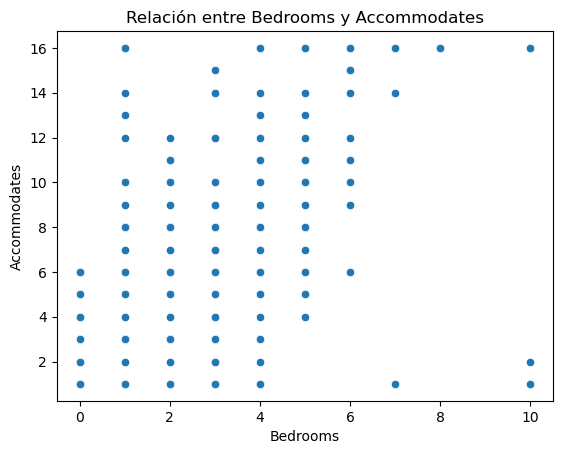

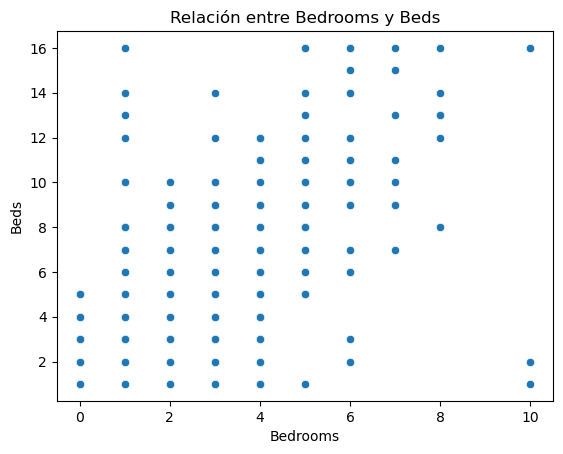

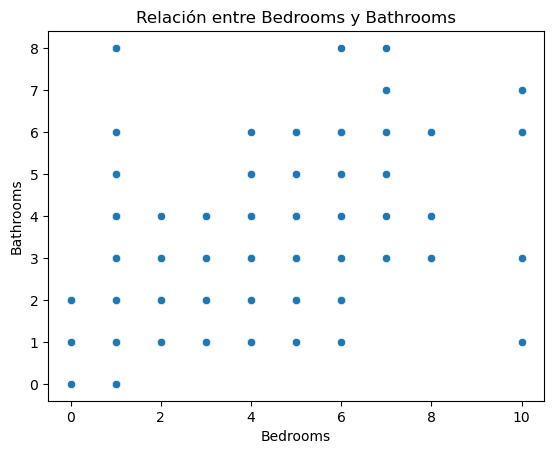

In [1229]:
sns.scatterplot(x='Beds', y='Accommodates', data=house_data_train)
plt.title('Relación entre Beds y Accommodates')
plt.show()

sns.scatterplot(x='Bedrooms', y='Accommodates', data=house_data_train)
plt.title('Relación entre Bedrooms y Accommodates')
plt.show()

sns.scatterplot(x='Bedrooms', y='Beds', data=house_data_train)
plt.title('Relación entre Bedrooms y Beds')
plt.show()

sns.scatterplot(x='Bedrooms', y='Bathrooms', data=house_data_train)
plt.title('Relación entre Bedrooms y Bathrooms')
plt.show()


In [1231]:
from sklearn.linear_model import LinearRegression

# Preparar los datos
X = house_data_train[['Bedrooms']]  # Variable independiente
y = house_data_train['Accommodates']  # Variable dependiente

# Crear y ajustar el modelo de regresión
model = LinearRegression()
model.fit(X, y)

# Ver los coeficientes de la regresión
print(f"Coeficiente de la regresión: {model.coef_[0]}")
print(f"Intercepto: {model.intercept_}")

Coeficiente de la regresión: 1.671832783561189
Intercepto: 1.0418451423522939


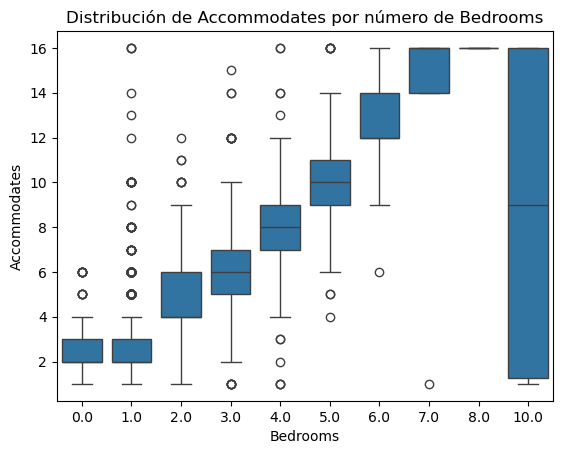

In [1233]:
sns.boxplot(x='Bedrooms', y='Accommodates', data=house_data_train)
plt.title('Distribución de Accommodates por número de Bedrooms')
plt.show()

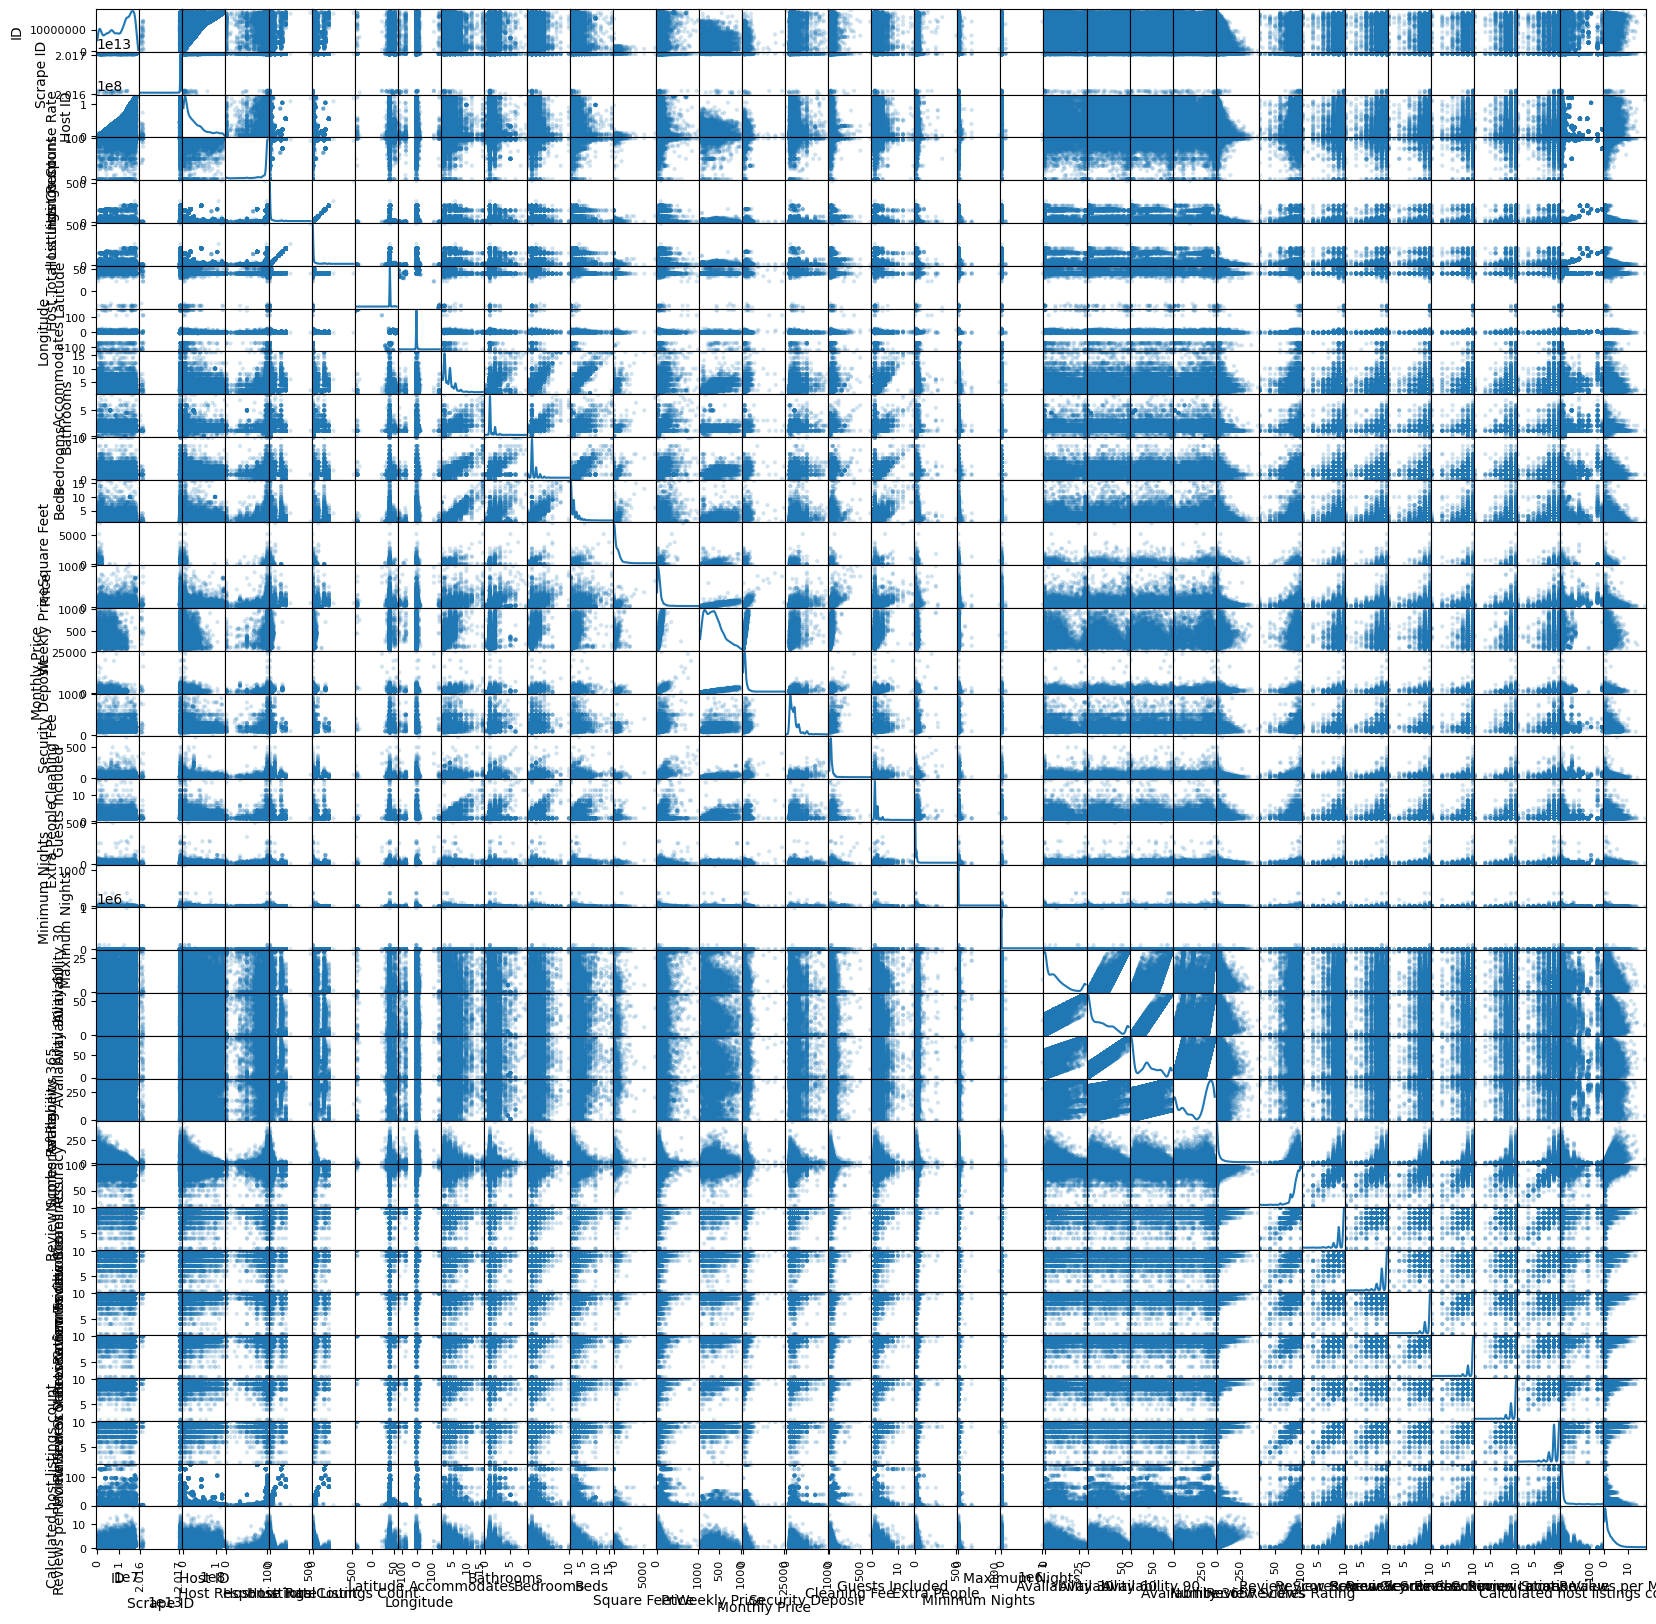

In [1235]:
pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

# 4. Modelado

Cargamos train 

In [1309]:
# Carga de datos
house_data_train = pd.read_csv('./data/airbnb_train.csv', sep=';', decimal='.')

#Empiezo a borrar columnas
columns_to_drop = [
    'ID', 'Listing Url','Scrape ID', 'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 
    'Host ID', 'Host URL', 'Host Name', 'Host Location', 'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Thumbnail Url',
    'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Market', 'Neighbourhood', 'Neighbourhood Cleansed',
    'Neighbourhood Group Cleansed', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Calendar Updated', 
    'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'License', 'Jurisdiction Names',
    'Cancellation Policy', 'Reviews per Month', 'Features', 'Experiences Offered', 'Country Code', 'Smart Location', 'Geolocation', 'Last Scraped',
    'Amenities', 'Zipcode', 'Bed Type'
]

# Eliminar columnas en house_data_train
house_data_train = house_data_train.drop(columns=columns_to_drop)


#Adaptar Country_Spain
#Crear una nueva columna 'Country_Spain' que será 1 si el país es España y 0 si no lo es
house_data_train['Country_Spain'] = house_data_train['Country'].apply(lambda x: 1 if x == 'Spain' else 0)
#Filtrar solo los registros donde 'Country_Spain' sea 1 (solo España)
house_data_train = house_data_train[house_data_train['Country_Spain'] == 1]
#Eliminar la columna 'Country' ya que hemos creado la columna 'Country_Spain'
house_data_train = house_data_train.drop(columns=['Country'])


# Elimino estas columnas 'City' y 'State' ya que no están normalizadas y al tener latitud y longitud no pierdo datos
house_data_train = house_data_train.drop(['City', 'State'], axis=1)


# Generar dummies para todas las categorías de 'Property Type'
house_data_train = pd.get_dummies(house_data_train, columns=['Property Type'], prefix='Property Type')
# Eliminar todas las columnas dummies excepto 'Property Type_Apartment'
house_data_train = house_data_train.drop(columns=[col for col in house_data_train.columns if 'Property Type_' in col and col != 'Property Type_Apartment'])


#Borro Square Feet
house_data_train = house_data_train.drop('Square Feet', axis=1)


# Convertir la columna 'Room Type' en variables dummy
room_type_dummies = pd.get_dummies(house_data_train['Room Type'], prefix='Room Type')
# Añadir las nuevas columnas al dataset
house_data_train = pd.concat([house_data_train, room_type_dummies], axis=1)
# Eliminar la columna original 'Room Type'
house_data_train = house_data_train.drop('Room Type', axis=1)


#Bathrooms Reemplazar los valores nulos (nan) por la mediana:
house_data_train['Bathrooms'].fillna(house_data_train['Bathrooms'].median(), inplace=True)
#Reemplazar los valores 0 por la mediana
house_data_train['Bathrooms'] = house_data_train['Bathrooms'].replace(0, house_data_train['Bathrooms'].median())
#Redondear los valores con decimales 
house_data_train['Bathrooms'] = house_data_train['Bathrooms'].round()
#Convertir la columna Bathrooms a tipo float
house_data_train['Bathrooms'] = house_data_train['Bathrooms'].astype(float)


house_data_train = house_data_train.dropna(subset=['Bedrooms'])
house_data_train = house_data_train.dropna(subset=['Beds'])
house_data_train = house_data_train.dropna(subset=['Host Since'])


house_data_train = house_data_train.drop(['Host Response Rate'], axis=1)


# Conversión de columnas de fecha a días desde una fecha de referencia
date_columns = ['Host Since', 'First Review', 'Last Review', 'Calendar last Scraped']
reference_date = pd.to_datetime('2000-01-01')  # Fecha de referencia

# Convertir cada columna de fechas a días desde la referencia
for column in date_columns:
    if column in house_data_train.columns:  # Validar que la columna exista
        house_data_train[column] = (pd.to_datetime(house_data_train[column]) - reference_date).dt.days

# Eliminar las columnas que tienen valores faltantes
columns_to_drop = [
    'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
    'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location',
    'Review Scores Value', 'First Review', 'Last Review'
]

house_data_train = house_data_train.drop(columns=columns_to_drop)

# Eliminar filas con valores nulos en la columna 'Price'
house_data_train_cleaned = house_data_train.dropna(subset=['Price'])
house_data_train.dropna(subset=['Price'], inplace=True)


# Limpieza y conversión de la columna 'Price'
if 'Price' in house_data_train.columns:  # Validar que la columna exista
    if house_data_train['Price'].dtype == 'object':  # Si está en formato texto
        # Eliminar símbolos ($, ,) y convertir a float
        house_data_train['Price'] = house_data_train['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Eliminamos outliers
house_data_train_no_outliers_bedrooms = house_data_train[house_data_train['Bedrooms'] <= 8]
house_data_train_no_outliers_accommodates = house_data_train[house_data_train['Accommodates'] <= 12]
house_data_train_no_outliers_accommodates = house_data_train[
    (house_data_train['Latitude'] >= 40) & 
    (house_data_train['Latitude'] <= 41)
]


Aplicamos en test

In [1312]:
# Carga de datos
house_data_test = pd.read_csv('./data/airbnb_test.csv', sep=';', decimal='.')

#Empiezo a borrar columnas
columns_to_drop = [
    'ID', 'Listing Url','Scrape ID', 'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 
    'Host ID', 'Host URL', 'Host Name', 'Host Location', 'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Thumbnail Url',
    'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Market', 'Neighbourhood', 'Neighbourhood Cleansed',
    'Neighbourhood Group Cleansed', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Calendar Updated', 
    'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'License', 'Jurisdiction Names',
    'Cancellation Policy', 'Reviews per Month', 'Features', 'Experiences Offered', 'Country Code', 'Smart Location', 'Geolocation', 'Last Scraped',
    'Amenities', 'Zipcode', 'Bed Type'
]

# Eliminar columnas en house_data_test
house_data_test = house_data_test.drop(columns=columns_to_drop)


#Adaptar Country_Spain
#Crear una nueva columna 'Country_Spain' que será 1 si el país es España y 0 si no lo es
house_data_test['Country_Spain'] = house_data_test['Country'].apply(lambda x: 1 if x == 'Spain' else 0)
#Filtrar solo los registros donde 'Country_Spain' sea 1 (solo España)
house_data_test = house_data_test[house_data_test['Country_Spain'] == 1]
#Eliminar la columna 'Country' ya que hemos creado la columna 'Country_Spain'
house_data_test = house_data_test.drop(columns=['Country'])


# Elimino estas columnas 'City' y 'State' ya que no están normalizadas y al tener latitud y longitud no pierdo datos
house_data_test = house_data_test.drop(['City', 'State'], axis=1)


# Generar dummies para todas las categorías de 'Property Type'
house_data_test = pd.get_dummies(house_data_test, columns=['Property Type'], prefix='Property Type')
# Eliminar todas las columnas dummies excepto 'Property Type_Apartment'
house_data_test = house_data_test.drop(columns=[col for col in house_data_test.columns if 'Property Type_' in col and col != 'Property Type_Apartment'])


#Borro Square Feet
house_data_test = house_data_test.drop('Square Feet', axis=1)


# Convertir la columna 'Room Type' en variables dummy
room_type_dummies = pd.get_dummies(house_data_test['Room Type'], prefix='Room Type')
# Añadir las nuevas columnas al dataset
house_data_test = pd.concat([house_data_test, room_type_dummies], axis=1)
# Eliminar la columna original 'Room Type'
house_data_test = house_data_test.drop('Room Type', axis=1)


#Bathrooms Reemplazar los valores nulos (nan) por la mediana:
house_data_test['Bathrooms'].fillna(house_data_test['Bathrooms'].median(), inplace=True)
#Reemplazar los valores 0 por la mediana
house_data_test['Bathrooms'] = house_data_test['Bathrooms'].replace(0, house_data_test['Bathrooms'].median())
#Redondear los valores con decimales 
house_data_test['Bathrooms'] = house_data_test['Bathrooms'].round()
#Convertir la columna Bathrooms a tipo float
house_data_test['Bathrooms'] = house_data_test['Bathrooms'].astype(float)


house_data_test = house_data_test.dropna(subset=['Bedrooms'])
house_data_test = house_data_test.dropna(subset=['Beds'])
house_data_test = house_data_test.dropna(subset=['Host Since'])


house_data_test = house_data_test.drop(['Host Response Rate'], axis=1)


# Conversión de columnas de fecha a días desde una fecha de referencia
date_columns = ['Host Since', 'First Review', 'Last Review', 'Calendar last Scraped']
reference_date = pd.to_datetime('2000-01-01')  # Fecha de referencia

# Convertir cada columna de fechas a días desde la referencia
for column in date_columns:
    if column in house_data_test.columns:  # Validar que la columna exista
        house_data_test[column] = (pd.to_datetime(house_data_test[column]) - reference_date).dt.days

# Eliminar las columnas que tienen valores faltantes
columns_to_drop = [
    'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
    'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location',
    'Review Scores Value', 'First Review', 'Last Review'
]

house_data_test = house_data_test.drop(columns=columns_to_drop)

# Eliminar filas con valores nulos en la columna 'Price'
house_data_test_cleaned = house_data_test.dropna(subset=['Price'])
house_data_test.dropna(subset=['Price'], inplace=True)


# Limpieza y conversión de la columna 'Price'
if 'Price' in house_data_test.columns:  # Validar que la columna exista
    if house_data_test['Price'].dtype == 'object':  # Si está en formato texto
        # Eliminar símbolos ($, ,) y convertir a float
        house_data_test['Price'] = house_data_test['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Eliminamos outliers
house_data_test_no_outliers_bedrooms = house_data_test[house_data_test['Bedrooms'] <= 8]
house_data_test_no_outliers_accommodates = house_data_test[house_data_test['Accommodates'] <= 12]
house_data_test_no_outliers_accommodates = house_data_test[
    (house_data_test['Latitude'] >= 40) & 
    (house_data_test['Latitude'] <= 41)
]


In [1314]:
from sklearn import preprocessing

# Dataset de train
data_train = house_data_train.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

In [1316]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# normalización/escalado con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [1318]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11144, 21)
Datos test:  (2784, 21)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

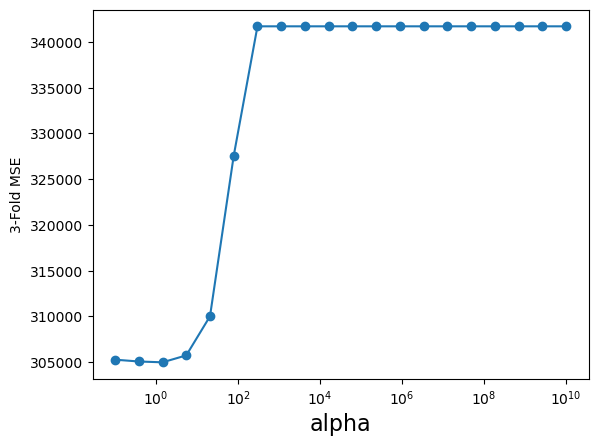

In [1320]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

Valor óptimo de alpha 1.438449888287663
Error cuadrático medio negativo promedio de -304,991
Esto indica que este nivel de regularización equilibra adecuadamente el ajuste del modelo y la penalización por complejidad.


In [1323]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = house_data.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 3.04e+05
MSE Modelo Lasso (test) : 3.13e+05
RMSE Modelo Lasso (train): 551
RMSE Modelo Lasso (test) : 559
Listing Url 123.1581340805729
Scrape ID 1.8695894318210905e-12
Last Scraped 3.880288887717368
Name -16.723194922081497
Summary 6.630155036809321
Space -15.302711517977283
Description -10.74362767687283
Experiences Offered -2.3276312329030837
Neighborhood Overview -1.2320251585408513
Notes 11.301062089811111
Transit -51.36458473666462
Access -18.74096903006815
Interaction -2.9276732640498264
House Rules 29.374502307969273
Thumbnail Url -140.97660945185902
Medium Url -160.7246371374369
Picture Url 0.0
XL Picture Url -23.567807613145465
Host ID -37.12126442510341
Host URL 0.0
Host Name 18.3957255845182


La diferencia entre el error en el conjunto de entrenamiento (551) y el de prueba (559) es pequeña, lo que indica que el modelo generaliza bien y no está sobreajustado.
Sin embargo, el RMSE sugiere que el modelo tiene un margen de error promedio de aproximadamente 551-559 que sin duda es excesivo tendría que ajustar el modelo para poderlo utilizar.

# 5. Conclusión

Pues solo puedo decir que he aprendido mucho haciendo esta práctica y que siento que mi modelo tenga un error promedio tan alta.
El análisis y la exploración me ha llevado muchas horas como debido a mi falta de experia.